In [71]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_us=df[(df['job_country'] == 'United States')].notna('salary_year_avg')]
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 92 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15766 non-null  object        
 1   job_title              15766 non-null  object        
 2   job_location           15544 non-null  object        
 3   job_via                15766 non-null  object        
 4   job_schedule_type      15752 non-null  object        
 5   job_work_from_home     15766 non-null  bool          
 6   search_location        15766 non-null  object        
 7   job_posted_date        15766 non-null  datetime64[ns]
 8   job_no_degree_mention  15766 non-null  bool          
 9   job_health_insurance   15766 non-null  bool          
 10  job_country            15766 non-null  object        
 11  salary_rate            15766 non-null  object        
 12  salary_year_avg        15766 non-null  float64       
 13  sala

In [5]:
job_title = df_us['job_title_short'].value_counts().index[:6].tolist()

In [6]:
job_title

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [ ]:
job_title_alt= df_us['job_title_short'].value_counts().head(6).index.tolist()

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [10]:
top_6 = df_us[df_us['job_title_short'].isin(job_title)]

In [17]:
order_df = top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()
order_df

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Data Analyst']

In [31]:
print(df['salary_year_avg'].describe())


count     22003.000000
mean     123286.274072
std       48312.449482
min       15000.000000
25%       90000.000000
50%      115000.000000
75%      150000.000000
max      960000.000000
Name: salary_year_avg, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_91732\403475821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=top_6


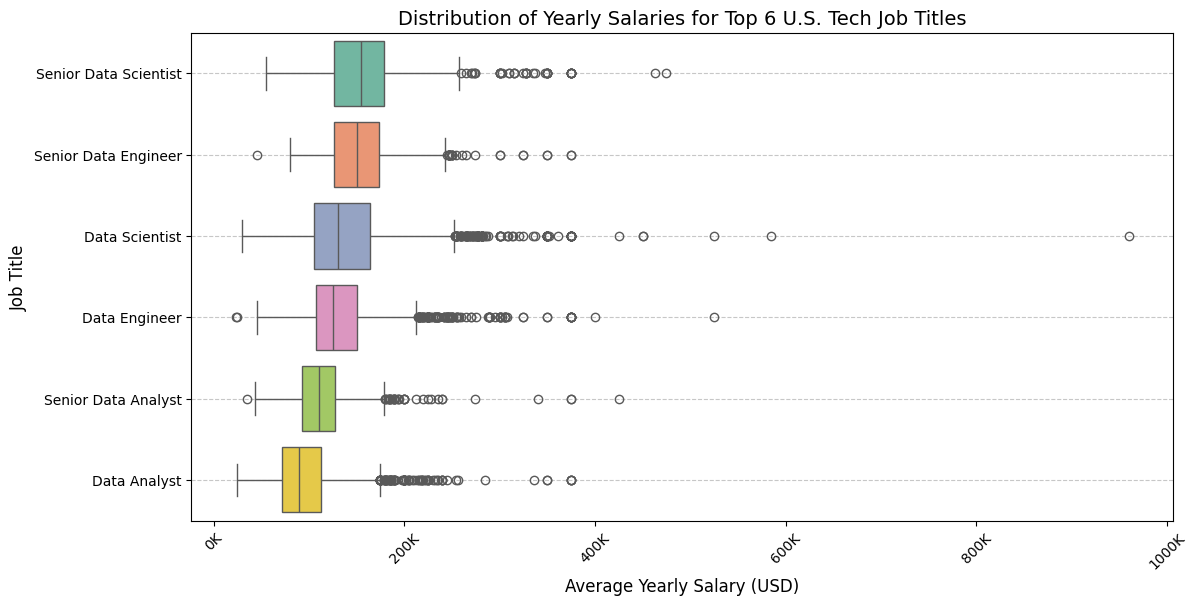

In [37]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))
ax=sns.boxplot(data=top_6
, y='job_title_short'
,x='salary_year_avg'
, order=order_df
,palette="Set2"
,orient='h' )                 # Horizontal orientation
# Formatting
plt.title("Distribution of Yearly Salaries for Top 6 U.S. Tech Job Titles", fontsize=14)
plt.ylabel("Job Title", fontsize=12)
plt.xlabel("Average Yearly Salary (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
             
# Format X-axis to show in 'K' instead of exponential
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_91732\326941082.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(


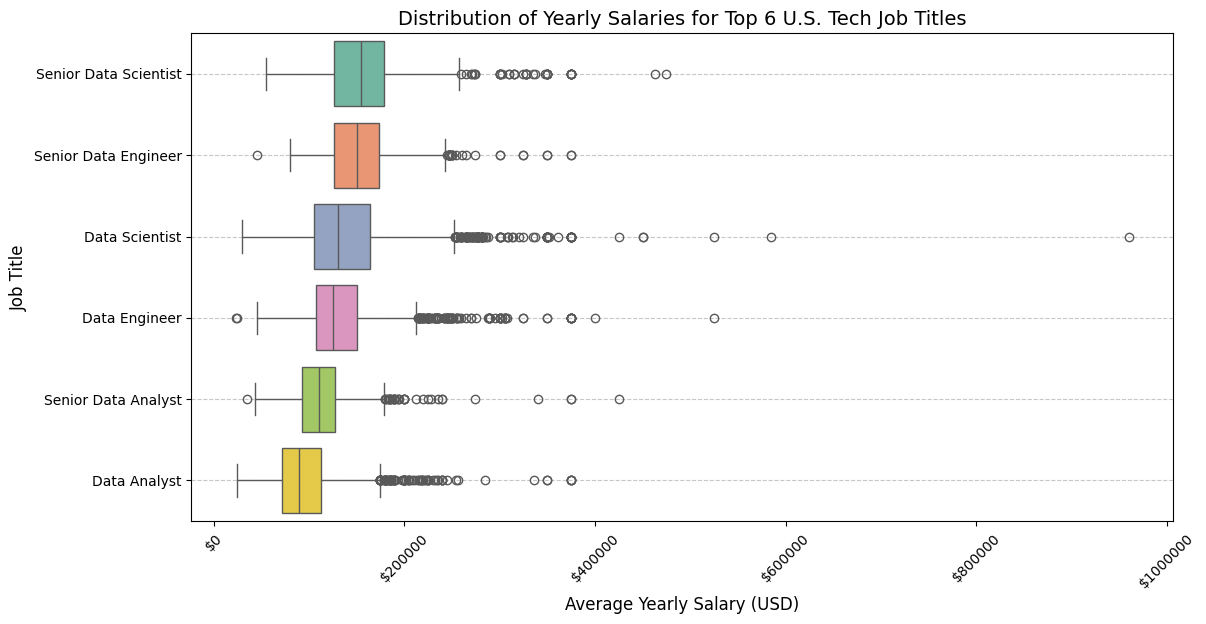

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter only non-null salary_year_avg and job_title_short
df_us_filtered = df_us[df_us['salary_year_avg'].notna()]

# Get top 6 job titles by count
top_jobs = df_us_filtered['job_title_short'].value_counts().nlargest(6).index
df_top_jobs = df_us_filtered[df_us_filtered['job_title_short'].isin(top_jobs)]

# Calculate median salary per job title for ordering
median_salaries = (
    df_top_jobs.groupby('job_title_short')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
)

# Set the order of job titles by median salary
order = median_salaries.index

# Plot
plt.figure(figsize=(12, 6))
ax=sns.boxplot(
    data=df_top_jobs,
    y='job_title_short',
    x='salary_year_avg',
    order=order,
    palette="Set2"
)

# Formatting
plt.title("Distribution of Yearly Salaries for Top 6 U.S. Tech Job Titles", fontsize=14)
plt.ylabel("Job Title", fontsize=12)
plt.xlabel("Average Yearly Salary (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x)}'))
plt.show()


In [57]:
df_da_us = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States') &
    (df['salary_year_avg'].notna())
].copy()

In [58]:
df_da_us= df_da_us.explode('job_skills')

In [59]:
df_da_us[['job_skills','salary_year_avg']].head()

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0


In [63]:
df_da_us_pay=df_da_us.groupby('job_skills')['salary_year_avg'].aggregate([ 'median', 'count']).sort_values(
    by='median', ascending=False).head(10)

In [64]:
df_da_us_pay

,median,count
job_skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


In [66]:
df_da_us_skills= df_da_us.groupby('job_skills')['salary_year_avg'].aggregate([ 'median', 'count']).sort_values(
    by='count', ascending=False).head(10)

In [67]:
df_da_us_skills

,median,count
job_skills,,
sql,91000.00,2508
excel,84392.00,1808
python,97500.00,1431
tableau,92875.00,1364
sas,90000.00,926
r,92500.00,893
power bi,90000.00,838
powerpoint,85000.00,462
word,81194.75,461


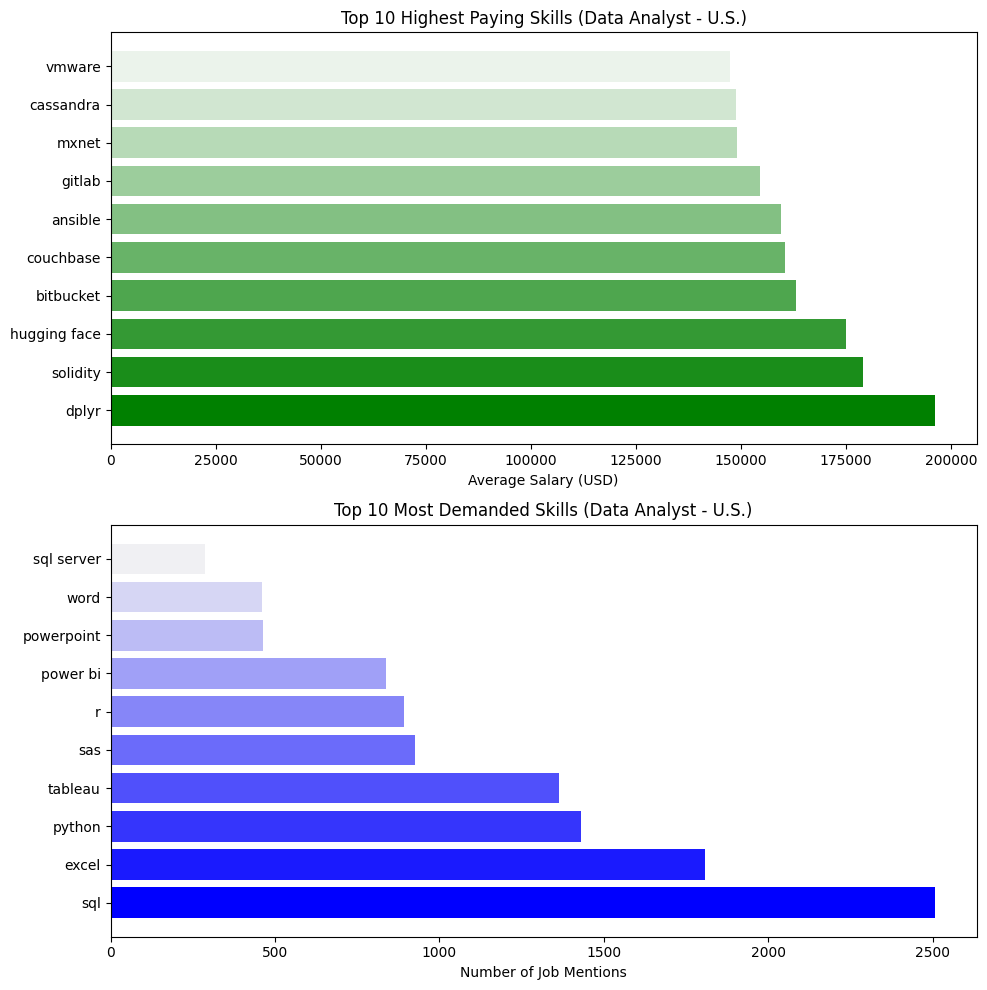

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Split skill strings into individual skills
df_skills = df_da_us[['job_skills', 'salary_year_avg']].dropna()
df_skills = df_skills.copy()
df_skills['job_skills'] = df_skills['job_skills'].str.split(',')

# Explode the skills so each skill has its own row
df_exploded = df_skills.explode('job_skills')
df_exploded['job_skills'] = df_exploded['job_skills'].str.strip()

# 1. Top 10 Highest Paying Skills
top_paid_skills = (
    df_exploded.groupby('job_skills')['salary_year_avg']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# 2. Top 10 Most Demanded Skills
top_demanded_skills = (
    df_exploded['job_skills']
    .value_counts()
    .head(10)
)

# Generate gradient color maps
def generate_color_shades(base_color, n):
    return sns.light_palette(base_color, n_colors=n, reverse=True)

paid_colors = generate_color_shades("green", 10)
demand_colors = generate_color_shades("blue", 10)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot 1: Top 10 Highest Paying Skills
axes[0].barh(top_paid_skills.index[::-1], top_paid_skills.values[::-1], color=paid_colors[::-1])
axes[0].set_title("Top 10 Highest Paying Skills (Data Analyst - U.S.)")
axes[0].set_xlabel("Average Salary (USD)")
axes[0].invert_yaxis()  # Tallest at top

# Plot 2: Top 10 Most Demanded Skills
axes[1].barh(top_demanded_skills.index[::-1], top_demanded_skills.values[::-1], color=demand_colors[::-1])
axes[1].set_title("Top 10 Most Demanded Skills (Data Analyst - U.S.)")
axes[1].set_xlabel("Number of Job Mentions")
axes[1].invert_yaxis()

# Layout and styling
plt.tight_layout()
plt.show()


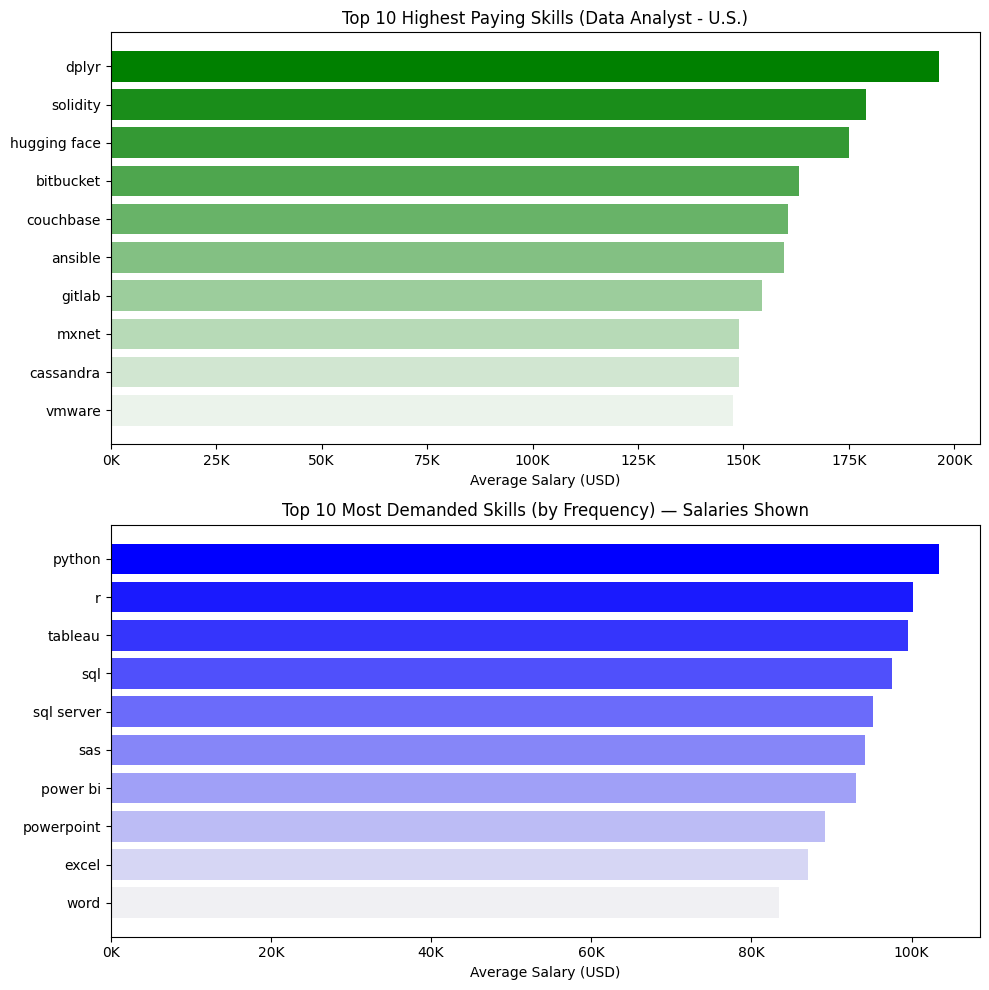

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Prepare skill data
df_skills = df_da_us[['job_skills', 'salary_year_avg']].dropna().copy()
df_skills['job_skills'] = df_skills['job_skills'].str.split(',')
df_exploded = df_skills.explode('job_skills')
df_exploded['job_skills'] = df_exploded['job_skills'].str.strip()

# 1️⃣ Top 10 Highest Paying Skills
top_paid_skills = (
    df_exploded.groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

# 2️⃣ Top 10 Most Demanded Skills (by count), but show their average salary
top_demanded_skills_names = (
    df_exploded['job_skills']
    .value_counts()
    .head(10)
    .index
)

# Get average salaries for those top demanded skills
top_demanded_skills_salary = (
    df_exploded[df_exploded['job_skills'].isin(top_demanded_skills_names)]
    .groupby('job_skills')['salary_year_avg']
    .mean()
    .sort_values(ascending=True)  # Sort to get tallest at bottom
)

# Sort top_paid_skills ascending to get tallest bar at bottom
top_paid_skills = top_paid_skills.sort_values(ascending=True)

# Generate gradient colors
paid_colors = sns.light_palette("green", n_colors=10)
demand_colors = sns.light_palette("blue", n_colors=10)

# Plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot 1: Highest Paying Skills
axes[0].barh(top_paid_skills.index, top_paid_skills.values, color=paid_colors)
axes[0].set_title("Top 10 Highest Paying Skills (Data Analyst - U.S.)")
axes[0].set_xlabel("Average Salary (USD)")
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Plot 2: Top Demanded Skills (by count), salaries shown
axes[1].barh(top_demanded_skills_salary.index, top_demanded_skills_salary.values, color=demand_colors)
axes[1].set_title("Top 10 Most Demanded Skills (by Frequency) — Salaries Shown")
axes[1].set_xlabel("Average Salary (USD)")
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Layout and display
plt.tight_layout()
plt.show()


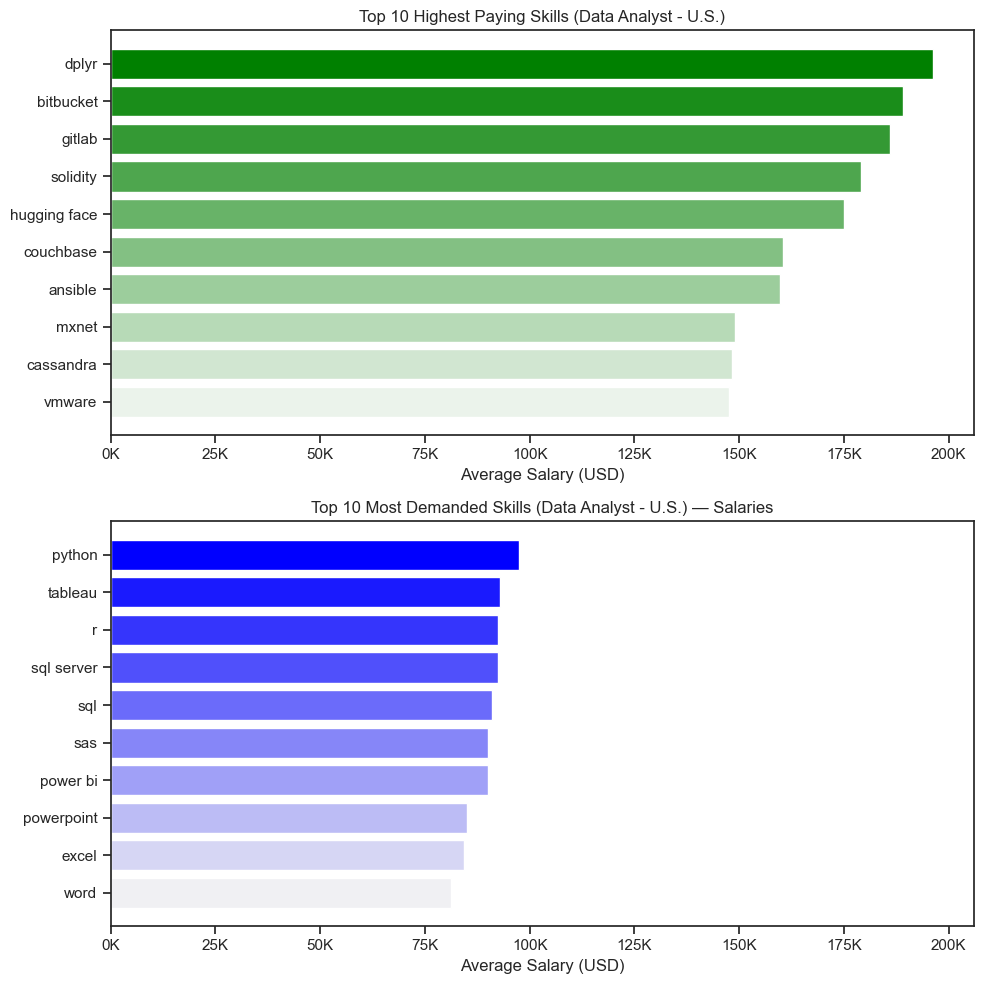

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Prepare skill data
df_skills = df_da_us[['job_skills', 'salary_year_avg']].dropna().copy()
df_skills['job_skills'] = df_skills['job_skills'].str.split(',')
df_exploded = df_skills.explode('job_skills')
df_exploded['job_skills'] = df_exploded['job_skills'].str.strip()

# 1️⃣ Top 10 Highest Paying Skills
top_paid_skills = (
    df_exploded.groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

# 2️⃣ Top 10 Most Demanded Skills (by count), but show their average salary
top_demanded_skills_names = (
    df_exploded['job_skills']
    .value_counts()
    .head(10)
    .index
)

top_demanded_skills_salary = (
    df_exploded[df_exploded['job_skills'].isin(top_demanded_skills_names)]
    .groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=True)  # tallest at bottom
)

# Sort top_paid_skills ascending too
top_paid_skills = top_paid_skills.sort_values(ascending=True)

# Get max x for shared x-axis
x_max = max(top_paid_skills.max(), top_demanded_skills_salary.max()) * 1.05  # add 5% padding

# Gradient colors
paid_colors = sns.light_palette("green", n_colors=10)
demand_colors = sns.light_palette("blue", n_colors=10)
sns.set_theme(style="ticks")

# Plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Highest Paying Skills
axes[0].barh(top_paid_skills.index, top_paid_skills.values, color=paid_colors)
axes[0].set_title("Top 10 Highest Paying Skills (Data Analyst - U.S.)")
axes[0].set_xlabel("Average Salary (USD)")
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
axes[0].set_xlim(0, x_max)

# Most Demanded Skills (Salaries)
axes[1].barh(top_demanded_skills_salary.index, top_demanded_skills_salary.values, color=demand_colors)
axes[1].set_title("Top 10 Most Demanded Skills (Data Analyst - U.S.) — Salaries")
axes[1].set_xlabel("Average Salary (USD)")
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
axes[1].set_xlim(0, x_max)

# Layout
plt.tight_layout()
plt.show()
